# NOTE
Run this in a terminal to get those plots going:
```
jovyan@jupyter-somebody:~$ julia
julia> using Pkg
julia> Pkg.add("Plots")
julia> Pkg.add("RDatasets")
julia> Pkg.add("StatsPlots")
`

[ Info: Saved animation to /home/jovyan/tmp.gif


Plots.AnimatedGif("/home/jovyan/tmp.gif")
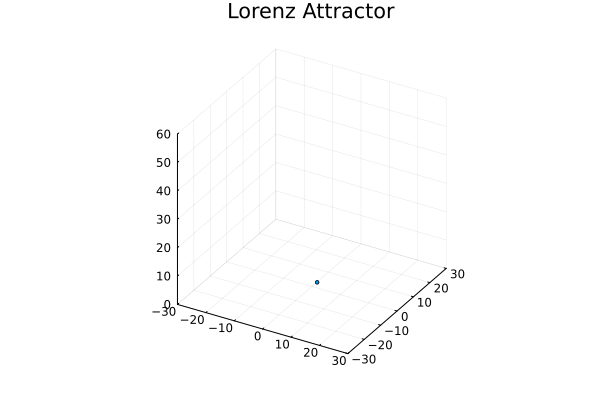

In [1]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    legend = false,
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

[ Info: Saved animation to /home/jovyan/tmp.gif


Plots.AnimatedGif("/home/jovyan/tmp.gif")
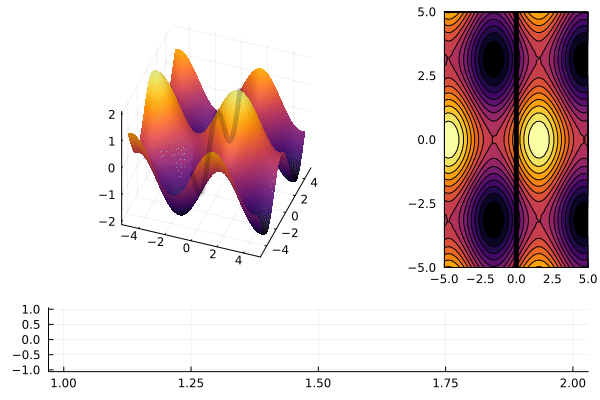

In [2]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

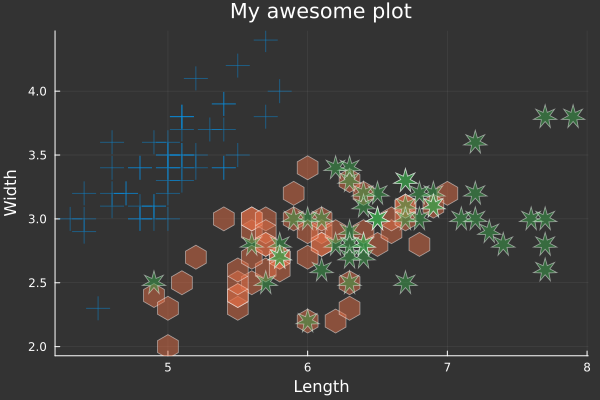

In [5]:
# load a dataset
using RDatasets
iris = dataset("datasets", "iris");

# load the StatsPlots recipes (for DataFrames) available via:
# Pkg.add("StatsPlots")
using StatsPlots

# Scatter plot with some custom settings
@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    title = "My awesome plot",
    xlabel = "Length",
    ylabel = "Width",
    m = (0.5, [:cross :hex :star7], 12),
    bg = RGB(0.2, 0.2, 0.2)
)